In [35]:
import pandas as pd
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [36]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [37]:
corr = df.corr(numeric_only=True)
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


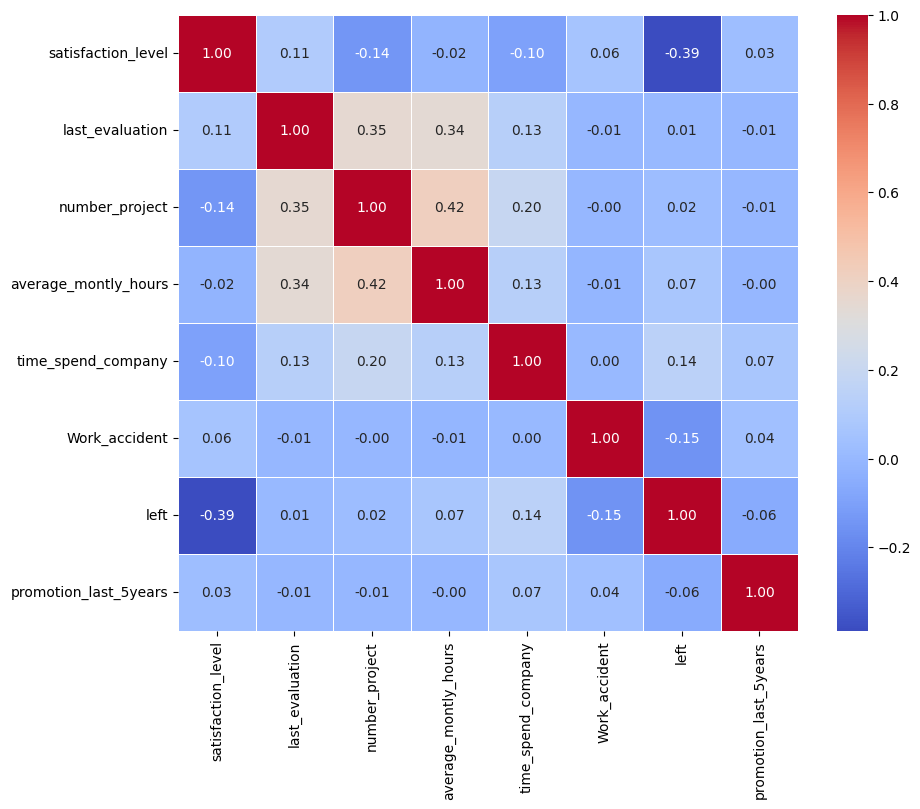

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title="Correlation Matrix Heatmap"
plt.show()


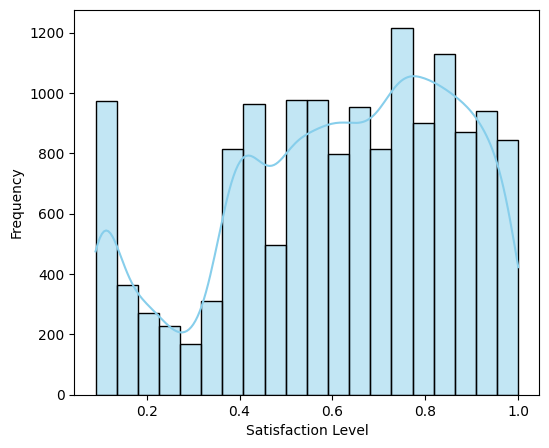

In [39]:
plt.figure(figsize=(6,5))
sns.histplot(df['satisfaction_level'], bins=20, kde=True, color="skyblue")

plt.title="Distribution of Employee Satisfaction"
plt.xlabel("Satisfaction Level")
plt.ylabel("Frequency")
plt.show()


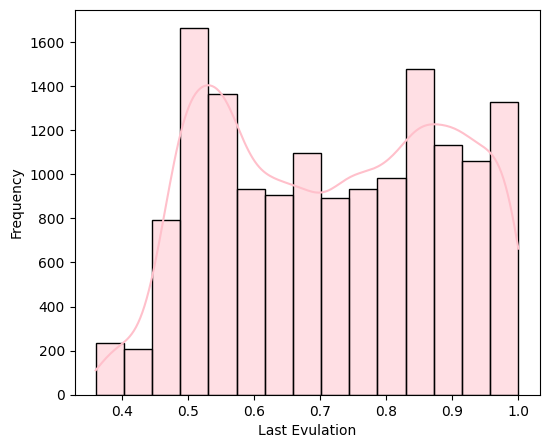

In [40]:
plt.figure(figsize=(6,5))
sns.histplot(df['last_evaluation'],bins=15,kde=True,color="pink")
plt.title="Distribution of Last Evulations"
plt.xlabel("Last Evulation")
plt.ylabel("Frequency")
plt.show()

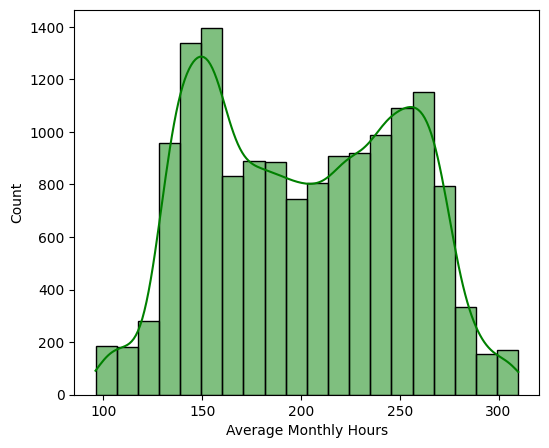

In [41]:
plt.figure(figsize=(6,5))
sns.histplot(df["average_montly_hours"],bins=20,kde=True,color="green")
plt.title="Distrubution of average_montly_hours)"
plt.xlabel("Average Monthly Hours")
plt.ylabel("Count")
plt.show()

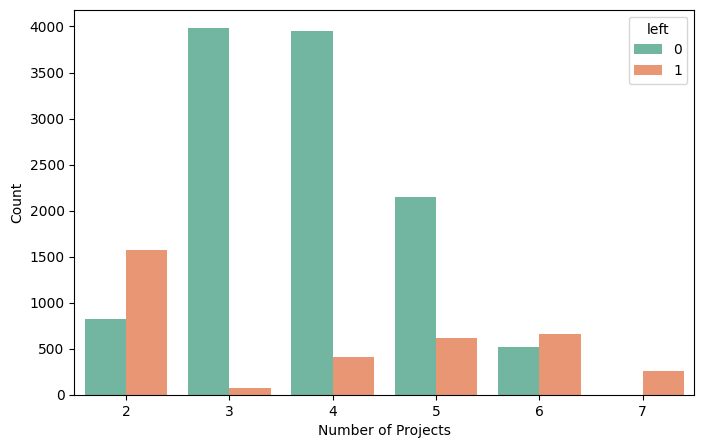

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(x="number_project", hue="left", data=df, palette="Set2")
plt.title="Employee Project Count vs Attrition (Stayed vs Left)"
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.show()


In [43]:
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [44]:
left_employees = df[df['left'] == 1]
features = left_employees[['satisfaction_level','last_evaluation']]
features.head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


In [45]:
import random as rd
import numpy as np
from sklearn.cluster import KMeans
rd.seed(42)
np.random.seed(42)
inertia=[]
k_range = range(1, 10)
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

inertia

[388.1861444413328,
 154.70797092069796,
 27.007707973602823,
 22.37576647388514,
 18.989331114206436,
 16.051614984068216,
 14.227243475322625,
 11.900741585599821,
 10.236958270567717]

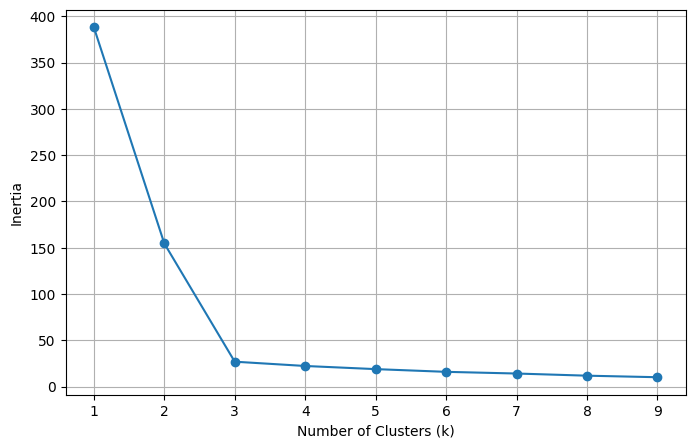

In [46]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title='Elbow Method for Optimal k'
plt.grid()
plt.show()

In [55]:
rd.seed(42)
np.random.seed(42)
kmean=KMeans(n_clusters=3,random_state=42,n_init=10)
labels=kmean.fit_predict(features)
left_employees.loc[:, 'Cluster'] = labels
left_employees

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Cluster
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,2


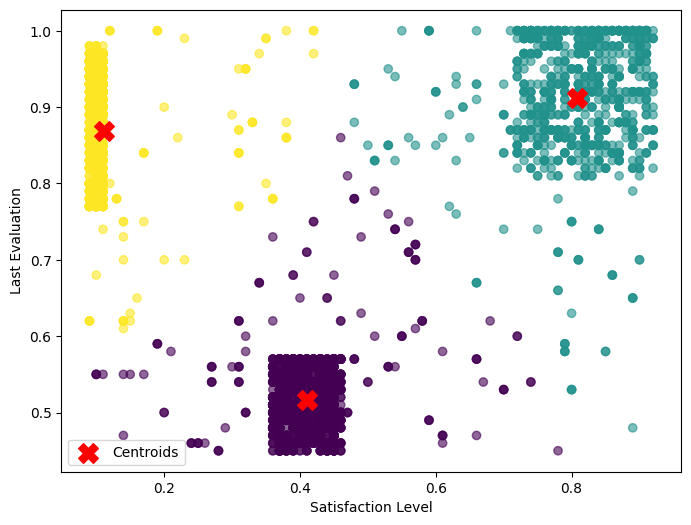

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    left_employees['satisfaction_level'],   # X ekseni
    left_employees['last_evaluation'],      # Y ekseni
    c=left_employees['Cluster'],            # Renk = cluster etiketi
    cmap='viridis', 
    alpha=0.6
)

# Küme merkezlerini çizelim
centers = kmean.cluster_centers_
plt.scatter(
    centers[:,0], centers[:,1], 
    c='red', s=200, marker='X', label='Centroids'
)

plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.title="KMeans Clusters of Employees who Left"
plt.legend()
plt.show()
